# Celebal AnaVerse
## Anomaly Detection



### Overview
The problem is to predict anomaly based on the readings captured by sensors.

• Objective: Evaluate candidates on their ability to work with tabular data, perform advanced analysis, and build robust predictive models.
• Format: Individual participation
• Deliverables: Jupyter Notebook with code

Evaluation Criteria
• Data Exploration and Preprocessing (20%):
o Handling missing values, outliers
o Feature engineering and correlation analysis

• Modeling (60%):
o Application of classical models (Logistic Regression, Support Vector Machine, KNN, Decision Trees) and advanced models (e.g. Random Forest, XGBoost, LightGBM, CatBoost, Neural Network etc.)
o Justification for model selection and tuning strategies

• Model Evaluation (20%):
o Use of appropriate metrics (e.g. Accuracy , Precision, Recall, F1 Score)
o Robustness checks, e.g., backtesting and residual analysis

Basic Approach:
* Data Load & Preprocessing
* EDA
* Feature Engineering
* Modeling
* Evaluation
* Conclusion & Submission

**========================================================================================================================================**

**========================================================================================================================================**

### 1. EDA- Exploartory Data Analysis

Exploratory Data Analysis (EDA) is the process of examining the dataset in depth to uncover underlying patterns, detect anomalies, test hypotheses, and validate assumptions using statistical summaries and visualizations.

*Objectives to implement EDA*
* Assess the distribution of anomalies vs. normal readings.
* Examine each sensor’s behavior across classes.
* Identify features like X3 that are constant and provide no learning value.
* Compare feature distributions between train and test datasets to detect potential data drift.
* Understand if temporal patterns (via Date) relate to anomalies.


In [2]:
# import and read the given dataset

import pandas as pd

# load the train dataset
df_train=pd.read_parquet('E:\Data Science\Celebal AnaVerse\\train.parquet')


#load the test dataset
df_test=pd.read_parquet('E:\Data Science\Celebal AnaVerse\\test.parquet')


# look for top 5 records in the train dataset
df_train.head() # top 5 rows in the dataset

,Date,X1,X2,X3,X4,X5,target
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0


In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# convert the date column to datetime
df_train['Date']=pd.to_datetime(df_train['Date'])
df_test['Date']=pd.to_datetime(df_train['Date'])

#### 1.1 Basic info

In [5]:
# Basic info of the datasets
print('Training dataset shape',df_train.shape)
print('Test Dataset info',df_test.shape)
print('\nTraining dataset info',df_train.info())
print('Missing Values in Train Data',df_train.isnull().sum())

Training dataset shape (1639424, 7)
Test Dataset info (409856, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639424 entries, 0 to 1639423
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1639424 non-null  datetime64[ns]
 1   X1      1639424 non-null  float64       
 2   X2      1639424 non-null  float64       
 3   X3      1639424 non-null  float64       
 4   X4      1639424 non-null  float64       
 5   X5      1639424 non-null  float64       
 6   target  1639424 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 87.6+ MB

Training dataset info None
Missing Values in Train Data Date      0
X1        0
X2        0
X3        0
X4        0
X5        0
target    0
dtype: int64


As seen above, 
1. Train and Test Shape is known
2. Sensor data columns are *float* datatype and are *non-null*
3. Target Variable is of *object* type, should be of *int*

In [6]:
# typecasting the target variable

df_train['target']=df_train['target'].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639424 entries, 0 to 1639423
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1639424 non-null  datetime64[ns]
 1   X1      1639424 non-null  float64       
 2   X2      1639424 non-null  float64       
 3   X3      1639424 non-null  float64       
 4   X4      1639424 non-null  float64       
 5   X5      1639424 non-null  float64       
 6   target  1639424 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 81.3 MB


#### 1.2 Preview the data

In [7]:
# preview
display(df_train.head())

,Date,X1,X2,X3,X4,X5,target
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0


Key Finding: 
1. X3 seems to be constant, recheck with *.value_counts()* function

In [8]:
df_train['X3'].value_counts()

X3
1.000000e+00    1504150
2.718282e+00      67820
7.389056e+00      15249
3.185593e+16      12930
1.171914e+16      11826
                 ...   
1.651636e+38          3
3.025077e+36          2
1.112864e+36          2
2.235247e+37          2
6.076030e+37          2
Name: count, Length: 88, dtype: int64

Key Finding:
1. X3 has differnt Values and is not constant

#### 1.3 Target Distribution

In [9]:
df_train['target'].value_counts()

target
0    1625386
1      14038
Name: count, dtype: int64

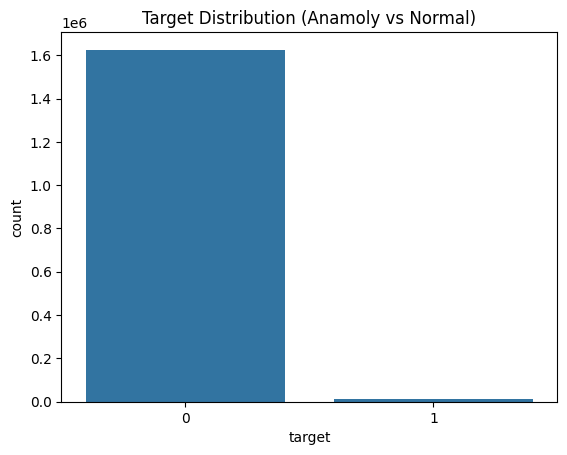

In [10]:
sns.countplot(x='target',data=df_train)
plt.title('Target Distribution (Anamoly vs Normal)')
plt.show()

In [11]:
# percentage distribution

anomaly_pct=df_train['target'].value_counts(normalize=True) * 100
print(anomaly_pct)

target
0    99.143724
1     0.856276
Name: proportion, dtype: float64


#### 1.4 Drop Constant Columns if any
If there are any constant columns, we can drop them because they do not contribute to the model.    

In [12]:
constant_cols=[col for col in df_train.columns if df_train[col].nunique()==1]
print(constant_cols)

[]


Key Finding:
1. None Constant Cols

#### 1.5 Univariate Feature Distribution


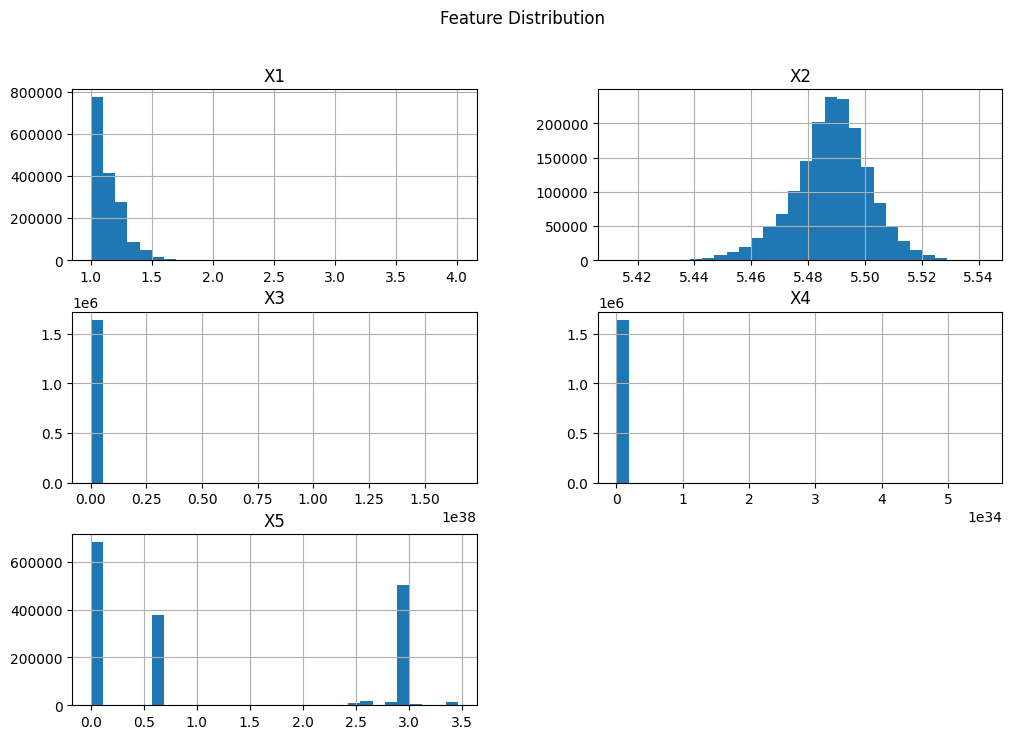

In [13]:
# univariate feature dist.

df_train.drop(['Date','target'],axis=1).hist(figsize=(12,8),bins=30)
plt.suptitle('Feature Distribution')
plt.show()

Key Findings:
1. X1 is right skewed
2. X2 has a normal Distribution
3. X3 is near constant (shall not be informative)
4. X4 has extreme magnitudes and a sparse variation
5. X5 is multimodal and has extreme outliers

We may or may not consider dropping X3, X4 further after more deeper researches

#### 1.6 Correlation Matrix
A correlation matrix is a square matrix that contains the correlation coefficients between all pairs of variables in a dataset

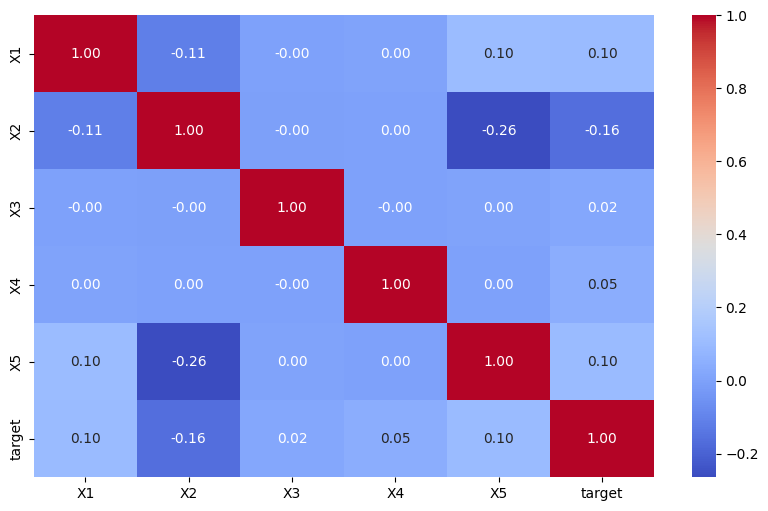

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.drop('Date',axis=1).corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.show()

Key Findings:
1. Weak Correlations observed overall
2. Notable feature target relationships- X1 & X5 show weak positive correlation with target; X2 shows weak negative correlation with target
3. Potentially uninformative features- X3 & X4

#### 1.7 Feature vs Target - Violin Plots.

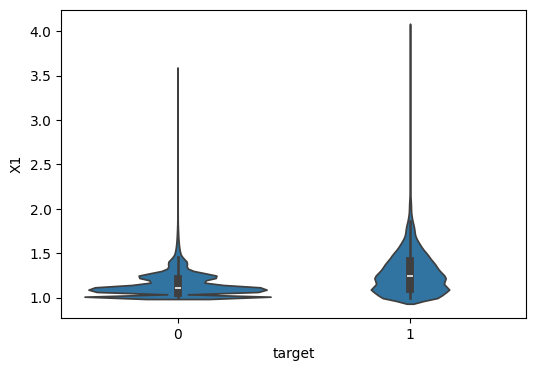

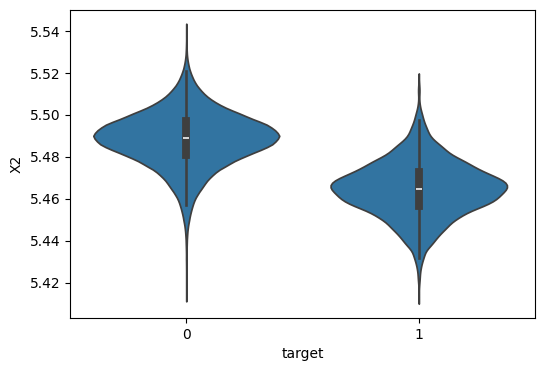

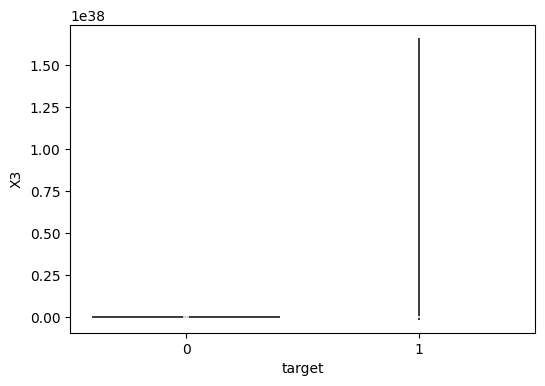

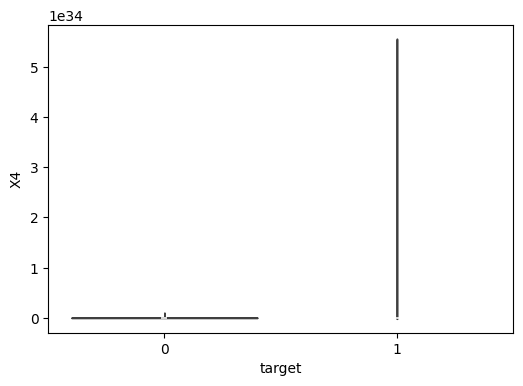

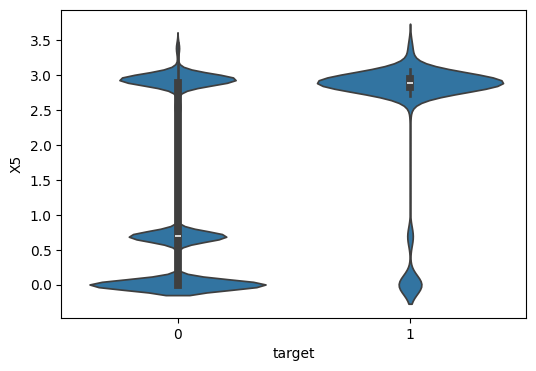

In [15]:
for col in ['X1','X2','X3','X4','X5']:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='target',y=col,data=df_train)
    plt.show()

Key Insights Variable vs target:
1. X1: Moderate seperation b/w classes.
2. X2: Shift in Distribution
3. X3: Extreme Values
4. X4: Highly skewed
5. X5: Clear seperated Classes


#### 1.8 Train vs Test Distribution

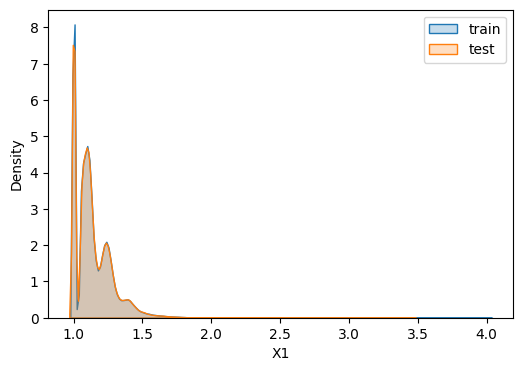

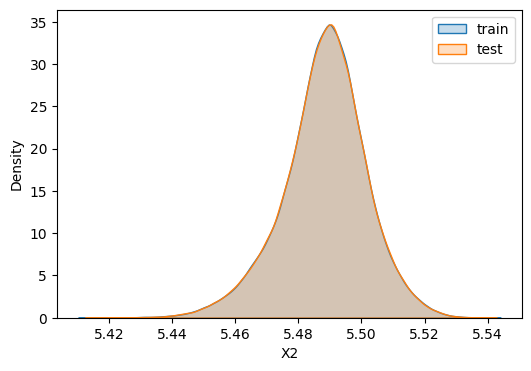

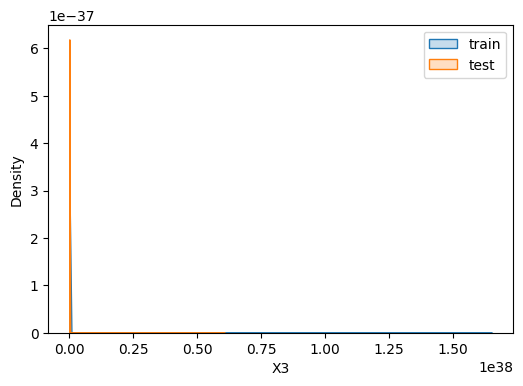

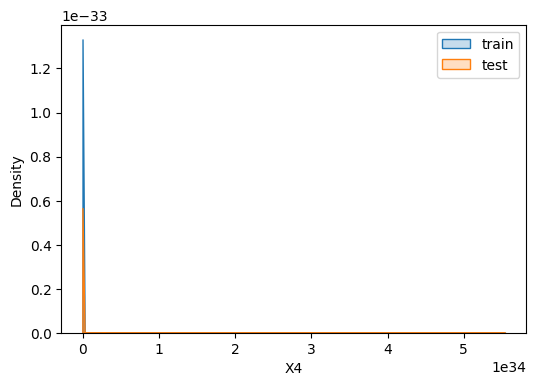

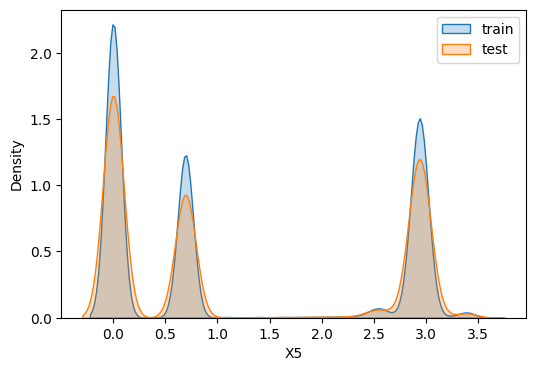

In [16]:
for col in ['X1','X2','X3','X4','X5']:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df_train[col],label='train',fill=True)
    sns.kdeplot(df_test[col],label='test',fill=True)
    plt.legend()
    plt.show()


Key Insights:
1. Good Features- X1,X2 and X5 - X1 requires transformation
2. Uninformative Features : X3 and X4

**==============================================================================================================================================**

**========================================================================================================================================**

### 2. Feature Engineering
Feature Engineering is the process of transforming raw data into meaningful features that better represent the underlying problem to the predictive models, thereby improving the model’s performance.

*Objectives:*
1. Enhance Model Performace
2. Improve Data Quality
3. Handle Distribution Shifts
4. Create Informative Features

In [17]:
# import necessary libs

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

In [18]:
# A single dedicated function for feature engineering

def feature_engineering(train,test):
    # copy data, avoid changes in original data
    train_fe=train.copy()
    test_fe=test.copy()

    # combine train and test to apply transformations in once
    combined=pd.concat([train_fe,test_fe],axis=0)

    # imputations for missing values not needed- there are none as seen in EDA

    # TRANSFORMATIONS   
    # Log Transformation for X1 to reduce Skewness
    combined['X1_log']=np.log1p(combined['X1'])

    # Scalee X3 and X4- they have extreme values
    minmax_scaler=MinMaxScaler()
    combined[['X3_scaled','X4_scaled']]=minmax_scaler.fit_transform(combined[['X3','X4']])

    # Scale X2 and X5 for tree based models
    std_scaler=StandardScaler()
    combined[['X2_scaled','X5_scaled']]=std_scaler.fit_transform(combined[['X2','X5']])

    # dropping raw columns can be an option- lets not drop

    # split back into train test
    train_fe=combined.iloc[:len(train_fe)].reset_index(drop=True)
    test_fe=combined.iloc[len(train_fe):].reset_index(drop=True)

    return train_fe, test_fe

In [19]:
# call the function for the dataframes
train_fe,test_fe=feature_engineering(df_train,df_test)

In [20]:
# check train_fe head
train_fe.head()

,Date,X1,X2,X3,X4,X5,target,ID,X1_log,X3_scaled,X4_scaled,X2_scaled,X5_scaled
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0.0,NaN,0.923831,0.0,3.101243e-35,-1.863845,1.304509
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1.0,NaN,0.934723,0.0,3.101243e-35,-2.246843,1.260710
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1.0,NaN,0.972833,0.0,1.153130e-34,-2.354817,1.304509
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1.0,NaN,0.975322,0.0,3.101243e-35,-2.211943,1.304509
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0.0,NaN,0.991598,0.0,3.101243e-35,-1.599116,1.304509


Observations:
1. Successful transformations
2. newly added transformed rows

Notes:
1. log1p transformation is used to handle zero or near zero values safely
2. MinMaxScaler is used for features with large scales

**==================================================================================================================**

**========================================================================================================================================**

### 3. Model Developement
In this stage, we aim to build and evaluate predictive models that can accurately classify whether a data point is an anomaly or not based on sensor readings. This is the most critical part of the pipeline, as it directly addresses the problem statement: predicting anomalies from sensor data.

*Objectives:*
1. Implementing both Classical and Advanced Models
2. Unified pipleine for good comparisions
3. Using Model Evaluation Metrics

In [21]:
# import necessary Libs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [22]:
# Prepare features and target
X = train_fe.drop(columns=['target', 'Date', 'ID'])
y = train_fe['target'].astype(int)

# handle missing values if any
X = X.fillna(0)

# Train-test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# handling class imbalance with class_weight='balanced'
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on validation data
y_pred = rf_model.predict(X_val)


In [23]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred, digits=4))
print("F1 Score (macro):", f1_score(y_val, y_pred, average='macro'))


Confusion Matrix:
 [[323962   1115]
 [  1449   1359]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9955    0.9966    0.9961    325077
           1     0.5493    0.4840    0.5146      2808

    accuracy                         0.9922    327885
   macro avg     0.7724    0.7403    0.7553    327885
weighted avg     0.9917    0.9922    0.9919    327885

F1 Score (macro): 0.7553180776622865


Key Insights:
1. After Implementing Algortihms such as Logistic Regression, KNN, RandomForest, XGBoost we found that above RandomForest is best model for now.
2. The dataset is quite imbalanced (99:1 in the target variable) and very-large so random forest gives a good F1 Score in lesser time complexity

Note: 
1. The F1 Score is the harmonic mean of Precision and Recall. It is particularly useful when you care about both false positives and false negatives.

2. F1-Score(Macro): When dealing with multi-class or imbalanced binary classification, we often compute the F1 score per class and then average.

F1 Score (macro) calculates the F1 score independently for each class, then takes the unweighted average.
​


**==================================================================================================================================================**

**==================================================================================================================================================**

### 4. Hyperparamter Tuning
Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a machine learning model to maximize its performance.

*Objectives:*
1. Improve Model Accuracy and F1-Score
2. Reduce overfitting
3. Optimize training Time

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Parameters to test (a small set of combinations)
n_estimators_list = [50, 100]
max_depth_list = [10, 20]
min_samples_split_list = [2, 5]

best_score = 0
best_params = {}

# Try different combinations
for n in n_estimators_list:
    for depth in max_depth_list:
        for split in min_samples_split_list:
            rf = RandomForestClassifier(
                n_estimators=n,
                max_depth=depth,
                min_samples_split=split,
                random_state=42,
                n_jobs=-1
            )
            scores = cross_val_score(rf, X, y, cv=3, scoring='f1_macro')
            avg_score = np.mean(scores)
            print(f"n_estimators={n}, max_depth={depth}, min_samples_split={split} => F1_macro={avg_score:.4f}")
            
            if avg_score > best_score:
                best_score = avg_score
                best_params = {
                    'n_estimators': n,
                    'max_depth': depth,
                    'min_samples_split': split
                }

print("\n✅ Best Parameters:", best_params)
print("✅ Best F1_macro Score:", best_score)


n_estimators=50, max_depth=10, min_samples_split=2 => F1_macro=0.7704
n_estimators=50, max_depth=10, min_samples_split=5 => F1_macro=0.7714
n_estimators=50, max_depth=20, min_samples_split=2 => F1_macro=0.7726
n_estimators=50, max_depth=20, min_samples_split=5 => F1_macro=0.7748
n_estimators=100, max_depth=10, min_samples_split=2 => F1_macro=0.7705
n_estimators=100, max_depth=10, min_samples_split=5 => F1_macro=0.7697
n_estimators=100, max_depth=20, min_samples_split=2 => F1_macro=0.7733
n_estimators=100, max_depth=20, min_samples_split=5 => F1_macro=0.7750

✅ Best Parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 5}
✅ Best F1_macro Score: 0.7749859485327736


Key Insights:
1. We have discovered the best F1 Score and Best Parameters for the Random Forest Model
2. Hyperparmameter tuning was quite time consuming due to larger dataset size

**==============================================================================================================================**

**==============================================================================================================================**

### 5. Final Prediction on Test dataframe

We are ready to use our tuned model to generate predictions for unseen data

In [26]:
# preprocess test dataset
X_test=test_fe.drop(columns=['Date','ID'])

In [27]:
# Fit the model on training data

final_model=RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X,y)

RandomForestClassifier(max_depth=20, min_samples_split=5, random_state=42)

In [29]:
# make predictions
X_test=test_fe.drop(columns=['Date','ID','target'],errors='ignore')
y_pred_test=final_model.predict(X_test)

In [30]:
# export predictions
test_fe['prediction']=y_pred_test
submission=test_fe[['ID','prediction']]
submission.to_csv('final_predictions.csv',index=False)

In [34]:
df_pred=pd.read_csv('E:\Data Science\Celebal AnaVerse\\final_predictions.csv')
df_pred['prediction'].value_counts()

prediction
0    407785
1      2071
Name: count, dtype: int64

Key Insights:
1. Successfully made predictions on data
2. Final Execution is done.

**==============================================================================================================================**

**==============================================================================================================================**

### 6. Potential Visualizations

1. Confusion Matrix: Shows True Positives, True Negatives, False Positives, and False Negatives; understand how the model is doing for each class
2. Precision-Recall Curve: evaluate the trade-off between precision and recall
3. ROC Curve: how well your model separates the classes; Plots True Positive Rate vs False Positive Rate at different thresholds. 



# Conatact Me:
### **Suvam Mohapatra**
- Mob: +91 986149041
- email: mohapatrasuvam179@gmail.com
- College: Chandigarh University, Mohali
- Github Link: https://github.com/Suvam-10/Celebal-Anaverse